In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gsw
import xarray as xr
import toolbox

# T-S diagrams

In [3]:
def TS_diagram(dataset, figsize=(8,8)):
    max_sal, min_sal = dataset['abs_salinity'].max(), dataset['abs_salinity'].min()
    max_temp, min_temp = dataset['cons_temperature'].max(), dataset['cons_temperature'].min()

    tempL = np.linspace(min_temp - 1, max_temp + 1, 156)
    salL = np.linspace(min_sal - 1, max_sal + 1, 156)
    Tg, Sg = np.meshgrid(tempL,salL)

    sigma_theta = gsw.sigma0(Sg, Tg)
    cnt = np.linspace(sigma_theta.min(), sigma_theta.max(), 156)

    fig, ax = plt.subplots(figsize=(6,6))

    # for i in range(1000
    plt.scatter(dataset['abs_salinity'][1:, :], dataset['cons_temperature'][1:, :], s=1, color='darkcyan');
    plt.scatter(dataset['abs_salinity'][0,1], dataset['cons_temperature'][0, 1], s=5, color='red')

    cs = ax.contour(Sg, Tg, sigma_theta, colors='k', zorder=1)
    cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')

    ax.set_xlabel('Absolute Salinity ($‰$)')
    ax.set_ylabel('Conservative Temperature[$^\circ$C]')

    ax.tick_params(direction='out')
    ax.set_xlim(min_sal - 1, max_sal + 1)
    plt.tight_layout()
    
    return fig, ax


In [9]:
sim = xr.load_dataset('../data/simulations/SA_5179m_t3650_diff-False.nc')

In [10]:
sim2 = toolbox.stuck_particles_mask(sim)

In [14]:
sim2

<xarray.Dataset>
Dimensions:           (obs: 3651, traj: 50000)
Dimensions without coordinates: obs, traj
Data variables:
    trajectory        (traj, obs) float64 0.0 0.0 0.0 0.0 ... 5e+04 5e+04 5e+04
    time              (traj, obs) datetime64[ns] 2019-12-30T12:00:00 ... 2010...
    lat               (traj, obs) float64 -32.15 -32.12 -32.08 ... -33.73 -33.74
    lon               (traj, obs) float64 6.295 6.353 6.37 ... -0.2144 -0.2338
    z                 (traj, obs) float64 5.179e+03 5.185e+03 ... 4.293e+03
    cons_temperature  (traj, obs) float32 0.7166 0.7281 0.7275 ... 0.7073 0.7133
    abs_salinity      (traj, obs) float32 34.74 34.74 34.74 ... 34.74 34.74
    mld               (traj, obs) float32 33.11 50.49 50.82 ... 17.87 10.74
    alpha             (traj, obs) float32 1e-06 1e-06 1e-06 ... 1e-06 1e-06
    density           (traj, obs) float32 1.035e+03 1.028e+03 ... 1.028e+03
    v_s               (traj, obs) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        v2.3.0-71-g202ef087
    parcels_mesh:           spherical

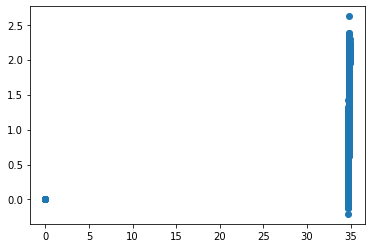

In [23]:
N = 1000
plt.scatter(sim['abs_salinity'][:, N], sim['cons_temperature'][:, N])

(array([ 9418.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0., 40582.]),
 array([ 0.       ,  1.1644226,  2.3288453,  3.4932678,  4.6576905,
         5.822113 ,  6.9865355,  8.150958 ,  9.315381 , 10.479803 ,
        11.644226 , 12.808649 , 13.973071 , 15.137494 , 16.301916 ,
        17.46634  , 18.630762 , 19.795185 , 20.959606 , 22.12403  ,
        23.288452 , 24.452875 , 25.617298 , 26.78172  , 27.946142 ,
        29.110565 , 30.274988 , 31.439411 , 32.603832 , 33.768257 ,
        34.93268  ], dtype=float32),
 <BarContainer object of 30 artists>)

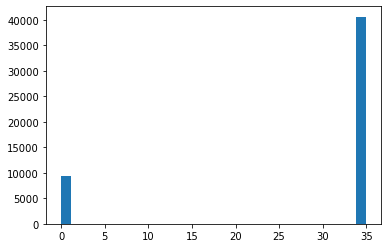

In [28]:
N = 3600
plt.hist(sim['abs_salinity'][:, N], bins=30)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.5311e+04]),
 array([ 0.       ,  1.163305 ,  2.32661  ,  3.4899151,  4.65322  ,
         5.816525 ,  6.9798303,  8.143135 ,  9.30644  , 10.469746 ,
        11.63305  , 12.796355 , 13.959661 , 15.122966 , 16.28627  ,
        17.449575 , 18.61288  , 19.776186 , 20.939491 , 22.102795 ,
        23.2661   , 24.429405 , 25.59271  , 26.756016 , 27.919321 ,
        29.082626 , 30.245932 , 31.409235 , 32.57254  , 33.735847 ,
        34.89915  ], dtype=float32),
 <BarContainer object of 30 artists>)

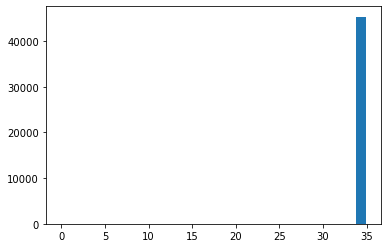

In [29]:
N = 1000
plt.hist(sim2['abs_salinity'][:, N], bins=30)

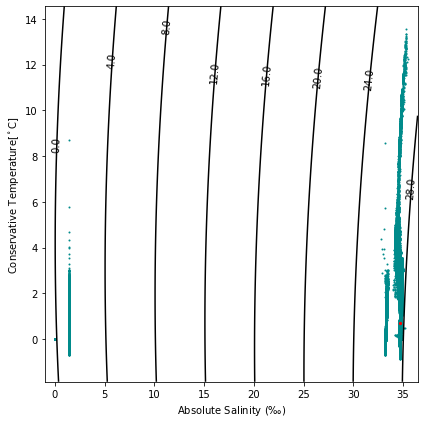

In [12]:
fig, ax = TS_diagram(sim)

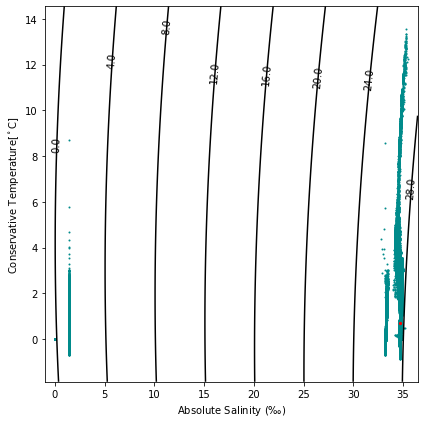

In [13]:
fig, ax = TS_diagram(sim2)

In [ ]:
tempL = np.linspace(1-1, 10+1, 156)

salL = np.linspace(30-1, 36+1, 156)

Tg, Sg = np.meshgrid(tempL, salL)
sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(), 156)

fig, ax = plt.subplots(figsize=(4,6))
cs = ax.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')

sc = plt.scatter(sim['salinity'][:, 6], sim['temperature'][:, 6], s=10)
cb = plt.colorbar(sc)

ax.set_xlabel('Salinity ($‰$)')
ax.set_ylabel('Temperature[$^\circ$C]')
ax.set_title('General T-S (Temperature and salinity) Diagram',fontsize=14, fontweight='bold')
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
ax.yaxis.set_major_locator(MaxNLocator(nbins=8))
ax.tick_params(direction='out')
